In [1]:
import matplotlib.pyplot as plt
import matplotlib.rcsetup as rcsetup
import matplotlib
%matplotlib inline

In [8]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import argparse
import numpy as np

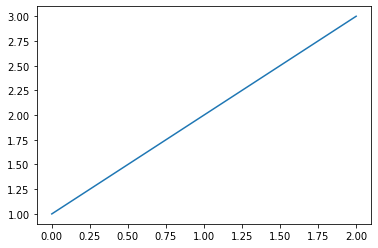

In [2]:
plt.plot([1,2,3])

plt.show()

In [3]:
def plot_results(data):
    win_rates = [calculate_win_rate(d) for d in data]
    x_data = np.arange(1, len(win_rates[0]) + 1)

    for win_rate in win_rates:
        plt.plot(x_data, win_rate)

    plt.legend(["a2c_easy_difficulty", "a2c_hard_difficulty", "a2c_normal_difficulty"])
    plt.xlabel("trials")
    plt.ylabel("win rate %")
    plt.show()

In [15]:
def extract_data(files):
    res = []
    for file in files:
        df = pd.read_csv(file).iloc[:,0]
        df = df.apply(lambda x: x[1: -1]).to_numpy().astype(float) 
        res.append(df)
    return res

def calculate_win_rate(data):
    counter = 0
    num_of_trials = len(data)
    win_rate = []

    for i in range(1, num_of_trials + 1):
        if data[i - 1] > 0:
            counter += 1
        win_rate.append(counter / i * 100)
    return win_rate

In [16]:
path = "evaluate_results/street_fighter/A2C/same_opponent"

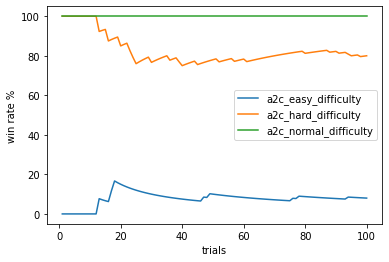

In [17]:
onlyfiles = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
data = extract_data(onlyfiles)
win_rates = [calculate_win_rate(d) for d in data]
x_data = np.arange(1, len(win_rates[0]) + 1)
for win_rate in win_rates:
    plt.plot(x_data, win_rate)
    
plt.legend(["a2c_easy_difficulty", "a2c_hard_difficulty", "a2c_normal_difficulty"])
plt.xlabel("trials")
plt.ylabel("win rate %")
plt.show()

In [5]:
import gym
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
from gym.wrappers.monitoring.video_recorder import VideoRecorder

env_id = 'PongNoFrameskip-v4'
video_folder = 'logs/videos/test.mp4'
video_length = 100

env = gym.make(env_id)
env = gym.wrappers.Monitor(env, "logs/videos/", force=True)
obs = env.reset()

# Record the video starting at the first step
# env = VecVideoRecorder(env, video_folder,
#                        record_video_trigger=lambda x: x == 0, video_length=video_length,
#                        name_prefix="random-agent-{}".format(env_id))


env.reset()


done = False
while not done:
  env.render()
  action = [env.action_space.sample()]
  obs, _, done, _ = env.step(action)
  
# Save the video

env.close()

In [6]:
import retro
env = gym.make(env_id)
enc = retro.retro_env.RetroEnv(env)

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'TimeLimit'

In [42]:
from stable_baselines3 import PPO, DQN, A2C

# agent = PPO.load("/home/david/Desktop/diplom/my_models/pong/pong_ppo/best_model.zip")
agent = A2C.load("/home/david/Desktop/diplom/my_models/pong/pong_a2c/best_model.zip")
# agent = DQN.load("/home/david/Desktop/diplom/my_models/pong/pong_dqn/best_model.zip")

In [43]:
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack, VecVideoRecorder, DummyVecEnv
env = make_atari_env('PongNoFrameskip-v4', n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

agent.set_env(env)



Wrapping the env in a VecTransposeImage.


In [44]:
import time
# env.reset()
# env = VecVideoRecorder(env, video_folder, record_video_trigger=lambda x: x == 0, video_length=500)
obs = env.reset()
done = False
while not done:
  env.render()
  time.sleep(.05)  
  actions, _ = agent.predict(obs)
  obs, rew, done, info = env.step(actions)
  # print(obs.shape)
  
env.close()